<div align="center">

# 📊 **Global Economic Forecast Hackathon** (with **Texas A&M Aggie Data Science**)

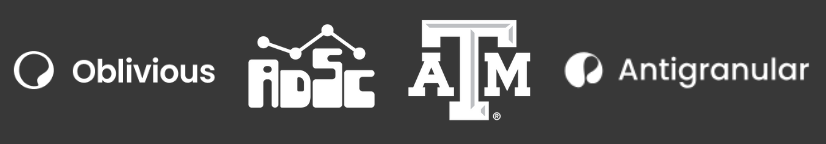

🎉 Welcome to a new [Antigranular](https://antigranular.com) event in collaboration with **Texas A&M Aggie Data Science**! This hackathon focuses on exploring and forecasting global economic trends with cutting-edge tools and methodologies.

🌎 Join us as we dive into economic challenges using Statistical Performance Indicators (SPIs) and let's push the boundaries of privacy preserving data science!

🦜 **Any questions?** Head over to our [Discord](https://discord.com/invite/KJwApgXs4s)!

<a href="https://discord.com/invite/KJwApgXs4s"><img src="https://support.discord.com/hc/user_images/PRywUXcqg0v5DD6s7C3LyQ.jpeg" alt="Discord" width="100px" /></a>



</div>


## 🏃‍♂️ 1. Getting Started

In this section we will download the antigranular package and login




### 📦 Install Antigranular

This command installs the [Antigranular PyPI Package](https://pypi.org/project/antigranular/) on the local enviroment.


In [115]:
# Install the Antigranular package
!pip install antigranular &> /dev/null

### ✍ Login to the Enclave

Head over to the [Competition](https://www.antigranular.com/competitions/global-economic-forecast-hackathon-with-texas-a-m-aggie-data-science) to find your `<user_id>`, `<user_secret>` and the competition's name and copy that command here.

![img](https://docs.antigranular.com/shots/comp_cell.png)

In [116]:
import antigranular as ag
session = ag.login(<client_id>,<client_secret>, competition = "Global Economic Forecast Hackathon with Texas A&M Aggie Data Science")

Dataset "Statistical Performance Indicators" loaded to the kernel as statistical_performance_indicators
Key Name                       Value Type     
---------------------------------------------
train_x                        PrivateDataFrame
train_y                        PrivateDataFrame
test_x                         DataFrame      

Connected to Antigranular server session id: 23124f82-1348-4237-9c40-e8bc41e6bd99, the session will time out if idle for 25 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


## 🤖 2. A simple guide of AG

You can now simply use ``%%ag`` to run code on an enclave! You can always head over to our [Docs](https://docs.antigranular.com/) to learn more about AG, but for now, we can define train and test variables as follows.

In [117]:
%%ag
x_train = statistical_performance_indicators["train_x"]
y_train = statistical_performance_indicators["train_y"]
x_test = statistical_performance_indicators["test_x"]

### 🕵️‍♂️ Exploring data

Exploring data in Antigranular involves spending your epsilon budget, be mindful of your usage but remember that the less epsilon you use, the less accurate your results will get!

<img src="https://static.vecteezy.com/system/resources/thumbnails/016/589/195/small/light-bulb-8bit-pixel-png.png" alt="Lightbulb" width="50px" />

#### 🌀 Want to learn more about the data?

For this competition, we are using multiple Statistical Performance Indicators (SPIs) of different countries. If you want to learn more about SPIs, head over to the [World Bank](https://www.worldbank.org/en/programs/statistical-performance-indicators). For your convenience, I have also attatched a table with a small description of the ones we used here!

| Column Name         | Description                                                |
|-------------------|------------------------------------------------------------|
| intl_org_use      | Measures international organizations' usage of national data. |
| social_stats      | Reflects the quality of social statistics like health and education. |
| economic_stats    | Assesses the reliability of economic data for analysis.    |
| inst_stats        | Evaluates the quality of governance and institutional data. |
| pov_ratio         | Tracks data availability on the poverty headcount ratio.   |
| child_mortality   | Monitors under-5 mortality rate data quality and availability. |
| debt_service      | Measures the quality of national debt service data.        |
| safe_water        | Assesses the availability of safely managed water data.    |
| labor_force       | Evaluates labor force participation data by sex and age.   |
| no_poverty        | Tracks data quality for achieving SDG 1: No Poverty.       |
| zero_hunger       | Monitors data for achieving SDG 2: Zero Hunger.            |
| good_health       | Assesses data for achieving SDG 3: Good Health and Well-being. |
| quality_edu       | Measures data availability for SDG 4: Quality Education.   |
| gender_eq         | Evaluates data for achieving SDG 5: Gender Equality.       |
| clean_water       | Tracks data quality for SDG 6: Clean Water and Sanitation. |
| clean_energy      | Assesses data for achieving SDG 7: Affordable Clean Energy. |
| decent_work       | Monitors data for achieving SDG 8: Decent Work and Growth. |
| innovation        | Measures data for achieving SDG 9: Industry and Innovation. |
| reduced_ineq      | Tracks data availability for SDG 10: Reduced Inequalities. |
| cities            | Evaluates data for SDG 11: Sustainable Cities.             |
| consump_prod      | Measures data for SDG 12: Responsible Consumption.         |
| life_land         | Assesses data quality for SDG 15: Life on Land.            |
| peace_justice     | Tracks data for SDG 16: Peace and Justice.                 |
| partnerships      | Monitors data for SDG 17: Global Partnerships.             |


In [118]:
%%ag
x_train.info()

+----+-----------------+-------------+---------------+---------+----------+
|    | Column          | numerical   | categorical   | dtype   | bounds   |
|----+-----------------+-------------+---------------+---------+----------|
|  0 | intl_org_use    | True        | False         | float64 | (0, 1)   |
|  1 | social_stats    | True        | False         | float64 | (0, 1)   |
|  2 | economic_stats  | True        | False         | float64 | (0, 1)   |
|  3 | inst_stats      | True        | False         | float64 | (0, 1)   |
|  4 | pov_ratio       | True        | False         | float64 | (0, 1)   |
|  5 | child_mortality | True        | False         | float64 | (0, 1)   |
|  6 | debt_service    | True        | False         | float64 | (0, 1)   |
|  7 | safe_water      | True        | False         | float64 | (0, 1)   |
|  8 | labor_force     | True        | False         | float64 | (0, 1)   |
|  9 | no_poverty      | True        | False         | float64 | (0, 1)   |
| 10 | zero_

For our `Y` target, we are trying to predict the income level of the sample. Usually, countries are categorized in 4 buckets, but we simplified by focusing in 2 groups (low and lower middle income, versus upper middle and high income)which are separated by 0 and 1.



```
Income levels:
    1. 'Low income': 0,
    2. 'Lower middle income': 0,
    3. 'Upper middle income': 1,
    4. 'High income': 1,
```




In [119]:
%%ag
y_train.info()

+----+----------+-------------+---------------+---------+----------+
|    | Column   | numerical   | categorical   | dtype   | bounds   |
|----+----------+-------------+---------------+---------+----------|
|  0 | income   | True        | False         | int64   | (0, 1)   |
+----+----------+-------------+---------------+---------+----------+



In [120]:
%%ag
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   intl_org_use     409 non-null    float64
 1   social_stats     409 non-null    float64
 2   economic_stats   409 non-null    float64
 3   inst_stats       409 non-null    float64
 4   pov_ratio        409 non-null    float64
 5   child_mortality  409 non-null    float64
 6   debt_service     409 non-null    float64
 7   safe_water       409 non-null    float64
 8   labor_force      409 non-null    float64
 9   no_poverty       409 non-null    float64
 10  zero_hunger      409 non-null    float64
 11  good_health      409 non-null    float64
 12  quality_edu      409 non-null    float64
 13  gender_eq        409 non-null    float64
 14  clean_water      409 non-null    float64
 15  clean_energy     409 non-null    float64
 16  decent_work      409 non-null    float64
 17  innovation      

In [121]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': {},
 'dataset_costs': {}}

In [122]:
%%ag
ag_print(x_test)

     intl_org_use  social_stats  ...  peace_justice  partnerships
0        0.345361      0.388933  ...       0.404416      0.569629
1        0.621778      0.647431  ...       0.576656      0.591323
2        0.445232      0.684585  ...       0.555205      0.627712
3        0.297680      0.607115  ...       0.512303      0.639608
4        0.291881      0.649012  ...       0.443533      0.527642
..            ...           ...  ...            ...           ...
404      0.761598      0.648221  ...       0.595584      0.536039
405      0.608892      0.899605  ...       0.695268      0.650105
406      0.587629      0.726482  ...       0.629022      0.586424
407      0.192655      0.633992  ...       0.519874      0.535339
408      0.041881      0.621344  ...       0.559621      0.379286

[409 rows x 24 columns]





---



## 🧠 4. Another more advanced solution

In this section we evaluate an editorial solution in AG using TensorFlow!

In [177]:
%%ag
import tensorflow as tf
from op_pandas import standard_scaler, PrivateDataFrame
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from op_tensorflow import PrivateKerasModel, PrivateDataLoader


seqM = Sequential([
    Dense(448, activation='relu', input_shape=(24,)),  # First layer with 448 neurons
    Dense(224, activation='relu'),                     # Second layer with 224 neurons
    Dense(112, activation='relu'),                     # Third layer with 122 neurons
    Dense(56, activation='relu'),                      # Fourth layer with 56 neurons
    Dense(28, activation='relu'),                      # Fifth layer with 28 neurons
    Dense(1, activation='sigmoid')                     # Binary classification output
])

In [178]:
%%ag
# Create DP keras model
dp_model = PrivateKerasModel(model=seqM, l2_norm_clip=1, noise_multiplier=1)

# Use a standard (non-DP) optimizer directly from keras.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

# PrivateKerasModel uses similar API as standard Keras
dp_model.compile(
	optimizer = optimizer,
	loss = 'binary_crossentropy',
	metrics = ["accuracy"]
)

In [179]:
%%ag
data_loader = PrivateDataLoader(feature_df=x_train , label_df=y_train, batch_size=6)

In [180]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': {},
 'dataset_costs': {}}

20+20+20+20+20+20+20

In [192]:
%%ag
dp_model.fit(x=data_loader, epochs=20, target_delta=1)

Epoch 1/20

613/613 - 17s - loss: 0.0504 - accuracy: 0.9818 - 17s/epoch - 28ms/step

Epoch 2/20

613/613 - 17s - loss: 0.0901 - accuracy: 0.9682 - 17s/epoch - 27ms/step

Epoch 3/20

613/613 - 17s - loss: 0.0463 - accuracy: 0.9833 - 17s/epoch - 27ms/step

Epoch 4/20

613/613 - 16s - loss: 0.0662 - accuracy: 0.9752 - 16s/epoch - 27ms/step

Epoch 5/20

613/613 - 17s - loss: 0.0385 - accuracy: 0.9872 - 17s/epoch - 27ms/step

Epoch 6/20

613/613 - 16s - loss: 0.0538 - accuracy: 0.9812 - 16s/epoch - 27ms/step

Epoch 7/20

613/613 - 16s - loss: 0.0697 - accuracy: 0.9753 - 16s/epoch - 26ms/step

Epoch 8/20

613/613 - 17s - loss: 0.0513 - accuracy: 0.9800 - 17s/epoch - 28ms/step

Epoch 9/20

613/613 - 17s - loss: 0.0567 - accuracy: 0.9790 - 17s/epoch - 27ms/step

Epoch 10/20

613/613 - 16s - loss: 0.0438 - accuracy: 0.9861 - 16s/epoch - 27ms/step

Epoch 11/20

613/613 - 16s - loss: 0.0579 - accuracy: 0.9775 - 16s/epoch - 27ms/step

Epoch 12/20

613/613 - 16s - loss: 0.1132 - accuracy: 0.9621 - 

In [193]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': {},
 'dataset_costs': {}}

In [194]:
%%ag
y_pred = dp_model.predict(PrivateDataFrame(x_test), label_columns=["output"])

13/13 [==============================] - 0s 8ms/step



In [195]:
%%ag
# Note that the predictions are a float scalar, so we scale it!
def f(x: float) -> float:
    return 1 if x > 0.5 else 0

y_pred["output"] = y_pred["output"].map(f, output_bounds=(0, 1))

In [196]:
%%ag
result = submit_predictions(y_pred)

score: {'leaderboard': 0.9498191745391589, 'logs': {'BIN_ACC': 0.9498191745391589, 'LIN_EPS': -0.0}}

